<h1><strong><u>K-Nearest Neighbors Model</u></strong></h1>

In [20]:
%%capture
%run DataPreparation.ipynb

<h2><strong><u>KNN Model Selection</u></strong></h2>

<h3><strong><u>Validation Curves</u></strong></h3>

In [21]:
pipeline = Pipeline(
    [
        ("clf", KNeighborsClassifier())
    ]
)
neighbors = list(range(1, 151, 10))
train_scores, validation_scores = validation_curve(pipeline, X_train, y_train, cv=5, scoring='accuracy',
                                                   param_name="clf__n_neighbors",
                                                   param_range=neighbors,
                                                   n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

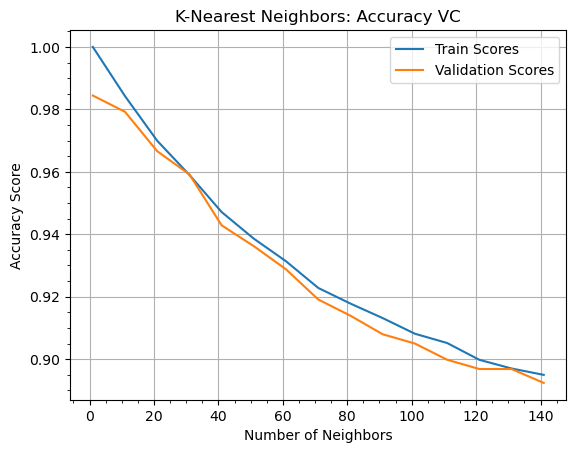

In [22]:
plt.ylabel("Accuracy Score")
plt.xlabel("Number of Neighbors")
plt.title("K-Nearest Neighbors: Accuracy VC")
plt.plot(neighbors, train_scores_mean, label="Train Scores")
plt.plot(neighbors, validation_scores_mean, label="Validation Scores")
plt.grid()
plt.minorticks_on()
plt.legend()

<h3><strong><u>Cross Validation Testing</u></strong></h3>

In [ ]:
pipeline = Pipeline(
    [
        ("clf", KNeighborsClassifier())
    ]
)
param_grid = {
    "clf__n_neighbors": [3, 7, 10, 12, 14, 17],
}

model = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
model.fit(X_train, y_train)
knn_classifier = model.best_estimator_
print(model.best_params_)

def knn_digit_classifier():
    return knn_classifier

{'clf__n_neighbors': 3}


<h4><strong><u>Findings From 'Model Selection' Section</u></strong></h4>
Just based off the results from the validation curve, I can see that increasing the neighbor size will not have a positive effect on the accuracy score. Therefore, I decided on a small range of small amounts of neighbors to use for the GridSearchCV.

<h2><strong><u>Model Evaluation</u></strong></h2>

<h3><strong><u>Learning Curves</u></strong></h3>

In [24]:
for key, value in clf_metrics.items():
    knn_train_sizes, knn_train_scores, knn_validation_scores = learning_curve(
        knn_classifier,
        X_train,
        y_train,
        cv=5,  # Number of folds for cross-validation
        scoring=value,  # Metric to evaluate the model
        n_jobs=-1,  # Use all available CPU cores
    )

    # Calculate mean and standard deviation for scores
    knn_train_scores_mean = np.mean(knn_train_scores, axis=1)
    knn_train_scores_std = np.std(knn_train_scores, axis=1)
    knn_validation_scores_mean = np.mean(knn_validation_scores, axis=1)
    knn_validation_scores_std = np.std(knn_validation_scores, axis=1)

    # Calculate spread of data around the mean
    knn_train_range_minus = knn_train_scores_mean - knn_train_scores_std
    knn_train_range_plus = knn_train_scores_mean + knn_train_scores_std
    knn_validation_range_minus = knn_validation_scores_mean - knn_validation_scores_std
    knn_validation_range_plus = knn_validation_scores_mean + knn_validation_scores_std

    lc_dict[key] = [[knn_train_scores_mean, knn_validation_scores_mean],
                    [knn_train_range_minus, knn_train_range_plus], 
                    [knn_validation_range_minus, knn_validation_range_plus], 
                    knn_train_sizes]

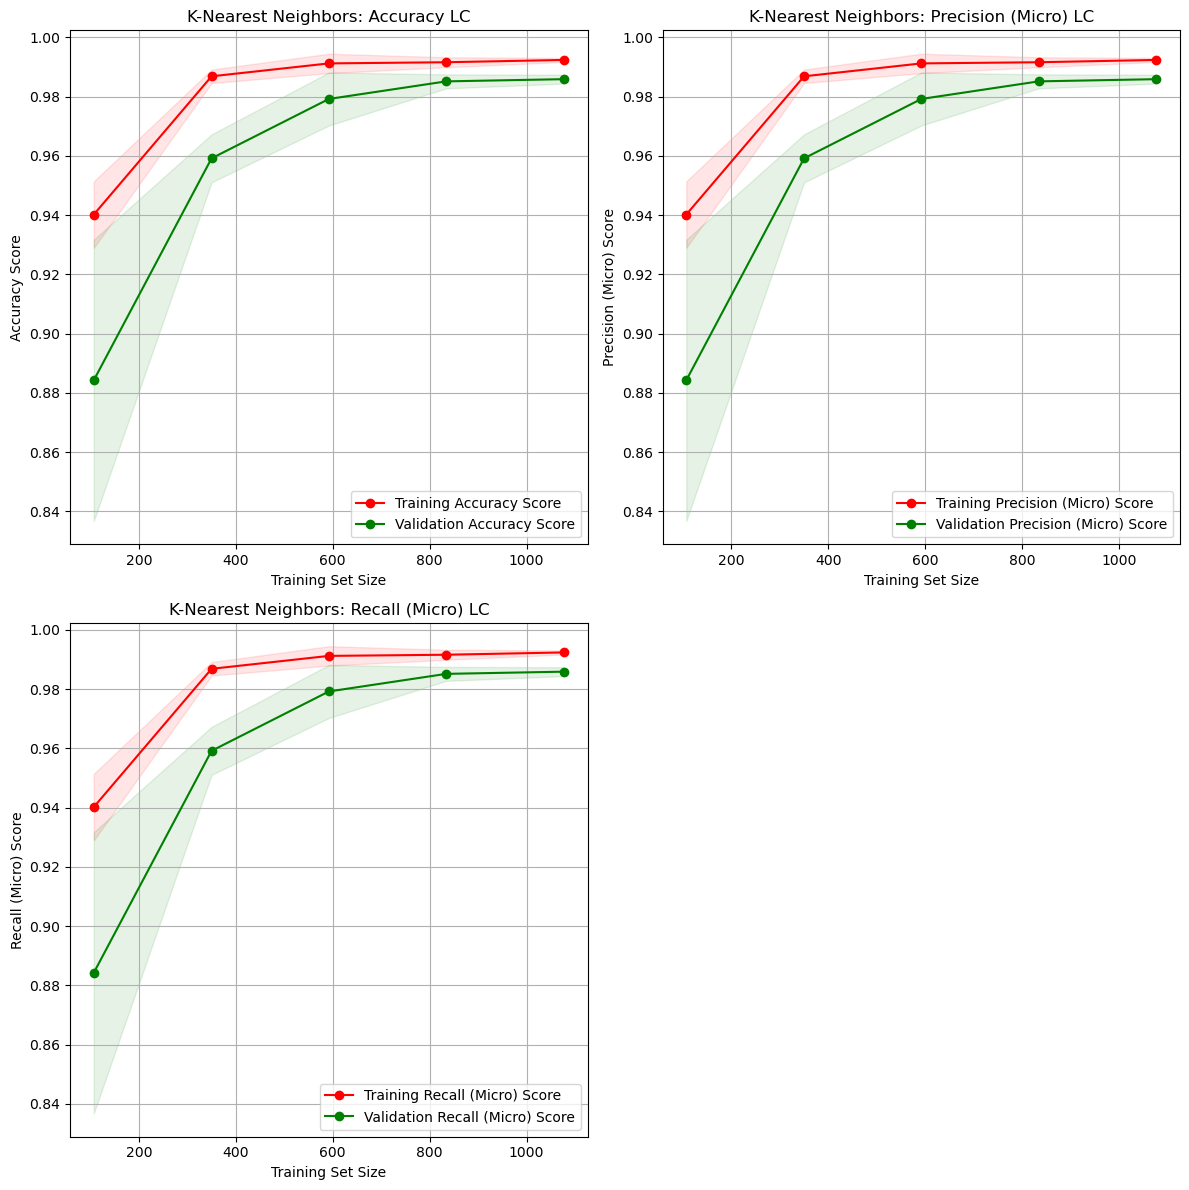

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Flatten the axes array for easier iteration
axs = axs.flatten()
count = 0
for key, value in lc_dict.items():
    axs[count].set_title(f"K-Nearest Neighbors: {key} LC")
    axs[count].set_xlabel("Training Set Size")
    axs[count].set_ylabel(f"{key} Score")
    axs[count].grid()

    axs[count].fill_between(value[3], value[1][0], value[1][1], alpha=0.1, color="r")
    axs[count].fill_between(value[3], value[2][0], value[2][1], alpha=0.1, color="g")
    axs[count].plot(value[3], value[0][0], 'o-', color="r", label=f"Training {key} Score")
    axs[count].plot(value[3], value[0][1], 'o-', color="g", label=f"Validation {key} Score")
    axs[count].legend()
    count += 1
    
fig.delaxes(axs[count]) 

plt.tight_layout()
plt.show()

<h3><strong><u>Evaluation Metrics</u></strong></h3>

In [26]:
for key, value in clf_metrics.items():
    print(f"{key}")
    nb_training_values = cross_val_score(knn_classifier, X_train, y=y_train, scoring=value, cv=5)
    print("CV Training Scores: ", nb_training_values)
    np_nb_training_values = np.array(nb_training_values)
    average = np.mean(np_nb_training_values)
    stDev = np.std(np_nb_training_values)
    print(f"Training Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV Training Scores:  [0.98518519 0.98888889 0.98513011 0.98513011 0.98513011]
Training Average and Standard Error:  0.99% ± 0.15% 

Precision (Micro)
CV Training Scores:  [0.98518519 0.98888889 0.98513011 0.98513011 0.98513011]
Training Average and Standard Error:  0.99% ± 0.15% 

Recall (Micro)
CV Training Scores:  [0.98518519 0.98888889 0.98513011 0.98513011 0.98513011]
Training Average and Standard Error:  0.99% ± 0.15% 



Text(0.5, 1.0, 'K-Nearest Neighbors: Confusion Matrix (Evaluation)')

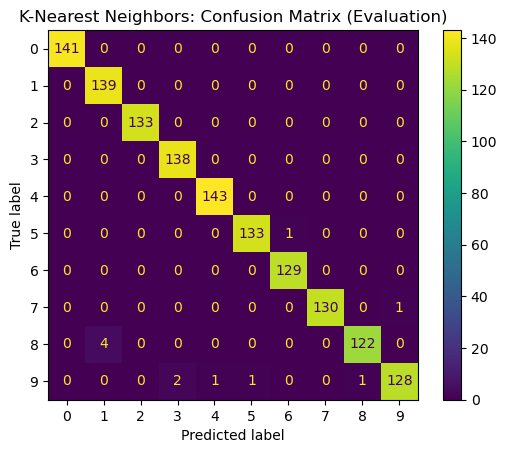

In [28]:
#Training Confusion Matrix
disp = ConfusionMatrixDisplay.from_estimator(knn_classifier, X_train, y_train)
disp.ax_.set_title("K-Nearest Neighbors: Confusion Matrix (Evaluation)")

<h4><strong><u>Findings From 'Model Evaluation' Phase</u></strong></h4>
In the evaluation of the selected K-Nearest Neighbors model, I found nearly perfect results for all evaluation methods.